# Обзор и первичное исследование данных


## Описание проекта и цели

Задача — проанализировать базу данных.

В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

## Описание данных

**Таблица `books`**

Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

**Таблица `authors`**

Содержит данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

**Таблица `publishers`**

Содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

**Таблица `ratings`**

Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

**Таблица `reviews`**

Содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.


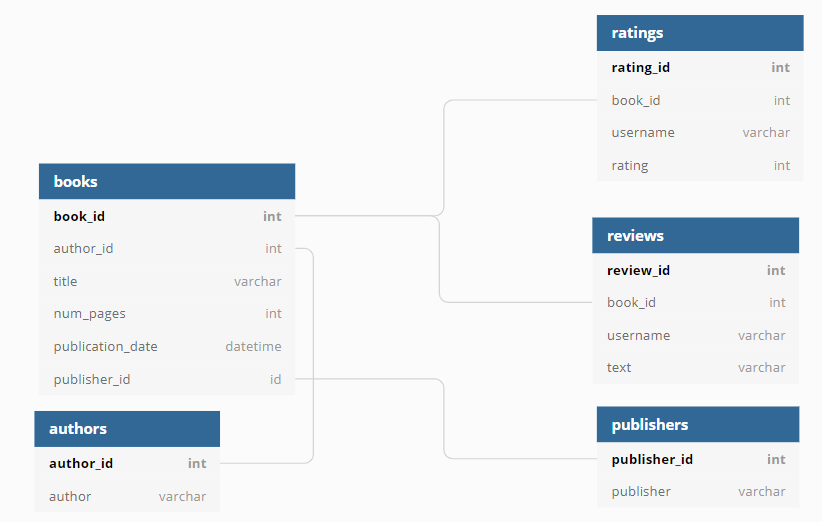

## Импорт библиотек

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine

# подавление предупреждений 
import warnings
warnings.filterwarnings('ignore')

# для вывода всех символов в значениях столбцов таблицы
pd.set_option('max_colwidth', -1)

In [2]:
# устанавливаем параметры
db_config = {'user': '...', # имя пользователя
'pwd':'...', # пароль
'host': '....',
'port': ...., # порт подключения
'db': '....'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

# Анализ

In [3]:
query_books = '''
        SELECT *
        FROM books
        LIMIT 5
        '''
books = pd.io.sql.read_sql(query_books, con = engine)

books

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope #1),322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before Columbus,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [4]:
query_authors = '''
        SELECT *
        FROM authors
        LIMIT 5
        '''
authors = pd.io.sql.read_sql(query_authors, con = engine)

authors

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [5]:
query_publishers = '''
        SELECT *
        FROM publishers
        LIMIT 5
        '''
publishers = pd.io.sql.read_sql(query_publishers, con = engine)

publishers

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [6]:
query_ratings = '''
        SELECT *
        FROM ratings
        LIMIT 5
        '''
ratings = pd.io.sql.read_sql(query_ratings, con = engine)

ratings

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [7]:
query_reviews = '''
        SELECT *
        FROM reviews
        LIMIT 5
        '''
reviews = pd.io.sql.read_sql(query_reviews, con = engine)

reviews

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. Over provide race technology continue these.
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Among admit investment argue security.
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but person sport treatment industry. Kitchen decision deep the. Social party body the.
3,4,3,johnsonamanda,Finally month interesting blue could nature cultural bit. Prepare beat finish grow that smile teach. Dream me play near.
4,5,3,scotttamara,Nation purpose heavy give wait song will. List dinner another whole positive radio fast. Music staff many green.


## кол-во книг после 1 января 2000 года

In [8]:
books

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope #1),322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before Columbus,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [9]:
query_books_after_01_01_2000 = '''
        SELECT 
            COUNT(DISTINCT title) AS cnt_book_after_01_01_2000
            
        FROM 
            books
            
        WHERE
            publication_date >= '2000-01-01'
        '''
books_after_01_01_2000 = pd.io.sql.read_sql(query_books_after_01_01_2000, con = engine)

books_after_01_01_2000

,cnt_book_after_01_01_2000
0,820


## кол-во обзоров и средняя оценка

Для каждой книги посчитайте количество обзоров и среднюю оценку

In [10]:
cnt_reviews_and_avg_ratings = '''
        SELECT 
            books.book_id,
            books.title,
            COUNT(DISTINCT reviews.review_id) AS cnt_reviews, 
            AVG (CAST(ratings.rating AS integer)) AS avg_ratings
             
        FROM 
            books
        LEFT JOIN reviews ON reviews.book_id = books.book_id 
        LEFT JOIN ratings ON ratings.book_id = books.book_id
            
        GROUP BY 
            books.book_id,
            books.title
            
        ORDER BY 
            cnt_reviews DESC,
            avg_ratings DESC         
                        
        LIMIT 10
             
        '''
cnt_reviews_and_avg_ratings = pd.io.sql.read_sql(cnt_reviews_and_avg_ratings, con = engine)

cnt_reviews_and_avg_ratings

,book_id,title,cnt_reviews,avg_ratings
0,948,Twilight (Twilight #1),7,3.662500
1,302,Harry Potter and the Prisoner of Azkaban (Harry Potter #3),6,4.414634
2,299,Harry Potter and the Chamber of Secrets (Harry Potter #2),6,4.287500
3,656,The Book Thief,6,4.264151
4,734,The Glass Castle,6,4.206897
5,497,Outlander (Outlander #1),6,4.125000
6,750,The Hobbit or There and Back Again,6,4.125000
7,695,The Curious Incident of the Dog in the Night-Time,6,4.081081
8,779,The Lightning Thief (Percy Jackson and the Olympians #1),6,4.080645
9,963,Water for Elephants,6,3.977273


## издательство

Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;

In [11]:
publishers_cnt_book = '''
        SELECT 
            publishers.publisher_id,
            publishers.publisher,
            COUNT(books.book_id) AS books_cnt
            
             
        FROM 
            books
        LEFT JOIN publishers ON publishers.publisher_id = books.publisher_id 
        
        WHERE
            books.num_pages >= 50
        
        GROUP BY
            publishers.publisher_id,
            publishers.publisher
            
        ORDER BY
            books_cnt DESC
                       
        LIMIT 1
             
        '''
publishers_cnt_book = pd.io.sql.read_sql(publishers_cnt_book, con = engine)

publishers_cnt_book

,publisher_id,publisher,books_cnt
0,212,Penguin Books,42


## автор с высокой средней оценкой книг

Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;

In [12]:
authors_best_avg_ratings = '''
        SELECT 
            authors.author_id, 
            authors.author,
            SUM(COUNT_RATING_BOOK.cnt_rating) AS cnt_rating,
            SUM(COUNT_RATING_BOOK.sum_rating) AS sum_rating,
            SUM(COUNT_RATING_BOOK.sum_rating) / SUM(COUNT_RATING_BOOK.cnt_rating) AS avg_rating
             
        FROM 
        (SELECT 
            books.book_id,
            books.title,
            books.author_id,
            COUNT(ratings.rating) AS cnt_rating,
            SUM(ratings.rating) AS sum_rating
             
        FROM 
            books
        INNER JOIN ratings ON ratings.book_id = books.book_id
             
        GROUP BY
            books.book_id,
            books.title,
            books.author_id          
            
        HAVING
            COUNT(ratings.rating) >= 50           
        ) AS COUNT_RATING_BOOK
        
        LEFT JOIN authors ON authors.author_id = COUNT_RATING_BOOK.author_id
        
        GROUP BY
            authors.author_id, 
            authors.author
            
            
        --HAVING--
            
            
        ORDER BY
            avg_rating DESC
            
                       
        LIMIT 1
             
        '''
authors_best_avg_ratings = pd.io.sql.read_sql(authors_best_avg_ratings, con = engine)

authors_best_avg_ratings

,author_id,author,cnt_rating,sum_rating,avg_rating
0,236,J.K. Rowling/Mary GrandPré,310.0,1329.0,4.287097


## среднее кол-во обзоров от пользователей

Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

In [13]:
avg_reviews_from_users_with_more_50_rating = '''
        SELECT 
            COUNT(reviews.review_id) / COUNT(DISTINCT reviews.username) AS avg_reviews_from_users_with_more_50_rating
             
        FROM 
        (SELECT 
            ratings.username,
            COUNT(ratings.rating_id)
            
        FROM 
            ratings  
            
        GROUP BY
            ratings.username
                    
        HAVING
            COUNT(ratings.rating_id) >= 50
        ) AS users_with_more_50_rating_score
        
                 
        INNER JOIN reviews ON reviews.username = users_with_more_50_rating_score.username
             
        '''

avg_reviews_from_users_with_more_50_rating = pd.io.sql.read_sql(avg_reviews_from_users_with_more_50_rating, con = engine)

avg_reviews_from_users_with_more_50_rating

,avg_reviews_from_users_with_more_50_rating
0,24


# Общие выводы и рекомендации



- **820** книг вышло после 1 января 2000 года;
- Для каждой книги посчитали количество обзоров и среднюю оценку:

In [14]:
cnt_reviews_and_avg_ratings

,book_id,title,cnt_reviews,avg_ratings
0,948,Twilight (Twilight #1),7,3.662500
1,302,Harry Potter and the Prisoner of Azkaban (Harry Potter #3),6,4.414634
2,299,Harry Potter and the Chamber of Secrets (Harry Potter #2),6,4.287500
3,656,The Book Thief,6,4.264151
4,734,The Glass Castle,6,4.206897
5,497,Outlander (Outlander #1),6,4.125000
6,750,The Hobbit or There and Back Again,6,4.125000
7,695,The Curious Incident of the Dog in the Night-Time,6,4.081081
8,779,The Lightning Thief (Percy Jackson and the Olympians #1),6,4.080645
9,963,Water for Elephants,6,3.977273


- Издательство, которое выпустило наибольшее число книг толще 50 страниц — **Penguin Books**;
- Автор с самой высокой средней оценкой книг — **J.K. Rowling/Mary GrandPré**;
- Среднее количество обзоров от пользователей, которые поставили больше 50 оценок - **24**.